In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=pd.read_csv('Train.csv')

In [3]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


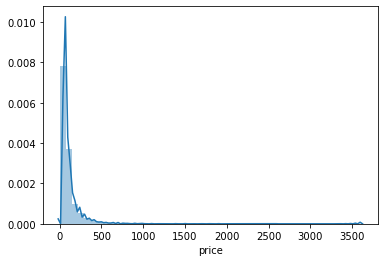

In [4]:
sns.distplot(data['price'])

In [5]:
data.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


# cleaning data

In [6]:
data['price'].mean()

112.56562650150138

In [7]:
data['price'].apply(lambda x:type(x)).value_counts()

<class 'float'>    13320
Name: price, dtype: int64

In [8]:
data['availability']=data['availability'].apply(lambda x:x[3:6])

In [9]:
data['availability']

0        Dec
1        dy 
2        dy 
3        dy 
4        dy 
        ... 
13315    dy 
13316    dy 
13317    dy 
13318    Jun
13319    dy 
Name: availability, Length: 13320, dtype: object

In [10]:
data['availability']=data['availability'].map({'Dec':12, 'dy ':0, 'May':5, 'Feb':2, 'Nov':11, 'Oct':10, 'Sep':9, 'Mar':3, 'Apr':4,
       'Aug':8, 'Jun':6, 'Jan':1, 'Jul':7, 'edi':0})

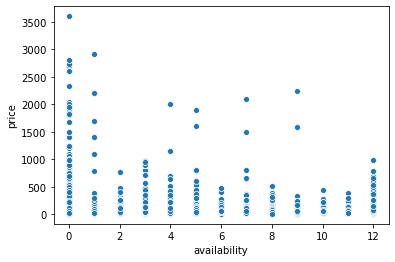

In [11]:
sns.scatterplot(data['availability'],data['price'])

In [12]:
data['size']=data['size'].apply(lambda x:str(x)[0:2])

In [13]:
data[data['size']=='na']='3'

In [14]:
data['size'].unique()

array(['2 ', '4 ', '3 ', '6 ', '1 ', '8 ', '7 ', '5 ', '11', '9 ', '3',
       '27', '10', '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [15]:
data['size']=data['size'].apply(lambda x:float(x))

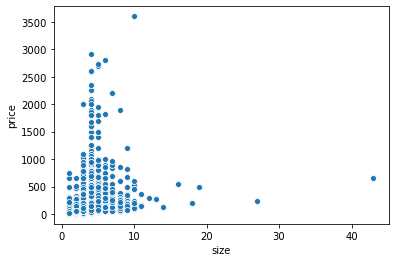

In [16]:
sns.scatterplot(data['size'],data['price'])

In [17]:
data['bath']=data['bath'].apply(lambda x:float(x))
data['balcony']=data['balcony'].apply(lambda x:float(x))

In [18]:
data.describe()

,size,bath,balcony
count,13320.000000,13263.000000,12727.000000
mean,2.803979,2.692980,1.586155
std,1.294214,1.340691,0.818289
min,1.000000,1.000000,0.000000
25%,2.000000,2.000000,1.000000
50%,3.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000
max,43.000000,40.000000,3.000000


In [19]:
#3 filling median values

In [20]:
data['bath'].fillna(3.0,inplace=True)
data['balcony'].fillna(2.0,inplace=True)

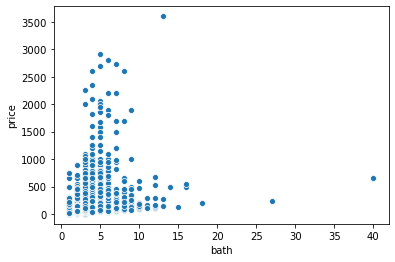

In [21]:
sns.scatterplot(data['bath'],data['price'])

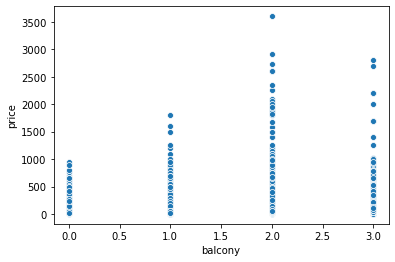

In [22]:
sns.scatterplot(data['balcony'],data['price'])

In [23]:
data['location'].fillna('unknown',inplace=True)
data['society'].fillna('unknown',inplace=True)

In [24]:
data['total_sqft']=data['total_sqft'].apply(lambda x:x[0:4])
alphanum=1-data['total_sqft'].apply(lambda x:x.isdecimal())
alpha_index=alphanum[alphanum==1].index

In [25]:
data.iloc[alpha_index]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
410,Super built-up Area,0,Kengeri,1.0,unknown,34.4,1.0,0.0,18.5
886,Super built-up Area,6,Chandapura,1.0,SuVue S,520,1.0,0.0,15.135
959,Super built-up Area,0,Kammasandra,1.0,Puitea,650,1.0,0.0,18.41
990,Super built-up Area,0,Sarjapur,1.0,DSousyl,633,1.0,0.0,17.535
1019,Plot Area,3,Marathi Layout,1.0,unknown,5.31,1.0,0.0,110
...,...,...,...,...,...,...,...,...,...
12252,Built-up Area,0,Gowdanapalya,5.0,unknown,24Sq,5.0,0.0,75
12334,Super built-up Area,6,Budigere,1.0,Brstaue,650,1.0,0.0,34.545
12560,Super built-up Area,12,Hosa Road,3.0,Sosisic,142.,3.0,1.0,110
12652,Plot Area,0,Billamaranahalli,2.0,AWharan,300S,2.0,2.0,150


In [26]:
data_checkpoint=data

In [27]:
data.drop(alpha_index,inplace=True)

In [28]:
data['total_sqft']=data['total_sqft'].apply(lambda x:float(x))

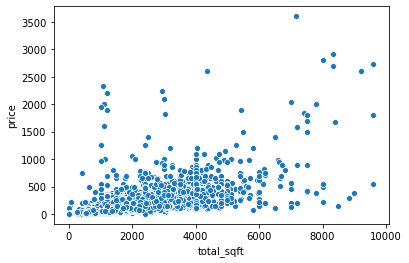

In [29]:
sns.scatterplot(data['total_sqft'],data['price'])

In [30]:
data.corr()

,size,total_sqft,bath,balcony
size,1.000000,0.447026,0.896546,0.186186
total_sqft,0.447026,1.000000,0.518474,0.206649
bath,0.896546,0.518474,1.000000,0.202466
balcony,0.186186,0.206649,0.202466,1.000000


In [31]:
data['price'].apply(lambda x:type(x)).value_counts()

<class 'float'>    13200
<class 'str'>         16
Name: price, dtype: int64

In [32]:
is_str=1-data['price'].apply(lambda x:isinstance(x,float))

In [33]:
str_index=is_str[is_str==1].index

In [34]:
check=data

In [35]:
data.iloc[str_index]['price']=data.iloc[str_index]['price'].apply(lambda x:float(x))

C:\Users\vivji\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
data.iloc[str_index]['price'].dtype

dtype('O')

In [37]:
#dropping string entries

In [38]:
data.drop(str_index,inplace=True)

In [39]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,12,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,0,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120
2,Built-up Area,0,Uttarahalli,3.0,unknown,1440.0,2.0,3.0,62
3,Super built-up Area,0,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95
4,Super built-up Area,0,Kothanur,2.0,unknown,1200.0,2.0,1.0,51
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,0,Whitefield,5.0,ArsiaEx,3453.0,4.0,0.0,231
13316,Super built-up Area,0,Richards Town,4.0,unknown,3600.0,5.0,2.0,400
13317,Built-up Area,0,Raja Rajeshwari Nagar,2.0,Mahla T,1141.0,2.0,1.0,60
13318,Super built-up Area,6,Padmanabhanagar,4.0,SollyCl,4689.0,4.0,1.0,488


In [40]:
data['price'].apply(lambda x:type(x)).value_counts()

<class 'float'>    13200
Name: price, dtype: int64

In [41]:
from scipy import stats

In [42]:
data['price']=data['price'].apply(lambda x:float(x))

In [43]:
z=np.abs(stats.zscore(data[['size', 'total_sqft', 'bath', 'balcony', 'price']]))

In [44]:
z

array([[0.62751042, 0.56274541, 0.52333702, 0.76623851, 0.49426012],
       [0.92001645, 1.27936636, 1.72050728, 1.74134753, 0.04770402],
       [0.14625301, 0.10460362, 0.52333702, 1.74134753, 0.34070473],
       ...,
       [0.62751042, 0.46133381, 0.52333702, 0.76623851, 0.35409814],
       [0.92001645, 3.77170541, 0.97255918, 0.76623851, 2.5120906 ],
       [1.40127386, 1.16644266, 1.27128512, 0.76623851, 0.64205635]])

In [45]:
data=data[(z < 3).all(axis=1)]

In [46]:
#outliers removed 

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12572 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12572 non-null  object 
 1   availability  12572 non-null  object 
 2   location      12572 non-null  object 
 3   size          12572 non-null  float64
 4   society       12572 non-null  object 
 5   total_sqft    12572 non-null  float64
 6   bath          12572 non-null  float64
 7   balcony       12572 non-null  float64
 8   price         12572 non-null  float64
dtypes: float64(5), object(4)
memory usage: 982.2+ KB


In [48]:
data_dummy=pd.get_dummies(data,prefix_sep="@",columns=['area_type','location','society'])

In [49]:
data_dummy

,availability,size,total_sqft,bath,balcony,price,area_type@Built-up Area,area_type@Carpet Area,area_type@Plot Area,area_type@Super built-up Area,...,society@YCnce R,society@YMhenLi,society@Yaenti,society@ZeodsWo,society@Zonce E,society@Zostaa,society@i1ncyRe,society@i1odsne,society@i1rtsCo,society@unknown
0,12,2.0,1056.0,2.0,1.0,39.07,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,4.0,2600.0,5.0,3.0,120.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3.0,1440.0,2.0,3.0,62.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,3.0,1521.0,3.0,1.0,95.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,2.0,1200.0,2.0,1.0,51.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,0,3.0,1715.0,3.0,3.0,112.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13315,0,5.0,3453.0,4.0,0.0,231.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,0,4.0,3600.0,5.0,2.0,400.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
13317,0,2.0,1141.0,2.0,1.0,60.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X=data_dummy.drop('price',axis=1)
y=pd.Series(data_dummy['price'])

In [51]:
#train test split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
# random forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [56]:
pred=rfr.predict(X_test)
mean_absolute_error(y_test,pred)

20.774892590525017

In [57]:
np.sqrt(mean_squared_error(y_test,pred))

39.64610000437434

In [58]:
from sklearn.metrics import r2_score


In [59]:
r2_score(y_test,pred)

0.740256269370339

In [60]:
residuals=y_test-pred

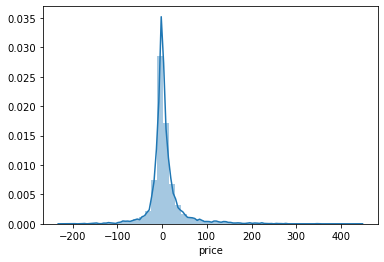

In [61]:
sns.distplot(residuals)

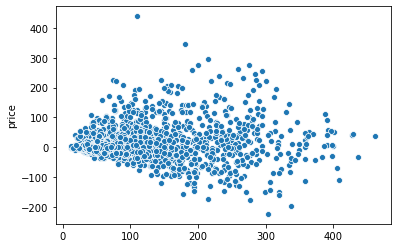

In [62]:
sns.scatterplot(pred,residuals)

# testing on test.csv

In [63]:
test_data= pd.read_csv('Test.csv')
test_data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN
1476,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN
1477,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN
1478,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN


In [64]:
test_data['availability']=test_data['availability'].apply(lambda x:x[3:6])

In [65]:
test_data['availability']=test_data['availability'].map({'Dec':12, 'dy ':0, 'May':5, 'Feb':2, 'Nov':11, 'Oct':10, 'Sep':9, 'Mar':3, 'Apr':4,
       'Aug':8, 'Jun':6, 'Jan':1, 'Jul':7, 'edi':0})

In [66]:
test_data['size']=test_data['size'].apply(lambda x:str(x)[0:2])
test_data[test_data['size']=='na']='3'
test_data['size']=test_data['size'].apply(lambda x:float(x))

In [67]:
test_data['bath']=test_data['bath'].apply(lambda x:float(x))
test_data['balcony']=test_data['balcony'].apply(lambda x:float(x))
test_data['bath'].fillna(3.0,inplace=True)
test_data['balcony'].fillna(2.0,inplace=True)

In [68]:
test_data['location'].fillna('unknown',inplace=True)
test_data['society'].fillna('unknown',inplace=True)

In [69]:
test_data['total_sqft']=test_data['total_sqft'].apply(lambda x:x[0:4])
alphanum_test=1-test_data['total_sqft'].apply(lambda x:x.isdecimal())
alpha_index_test=alphanum_test[alphanum_test==1].index
test_data.drop(alpha_index_test,inplace=True)
test_data['total_sqft']=test_data['total_sqft'].apply(lambda x:float(x))

In [70]:
test_data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,0,Brookefield,2.0,Roeekbl,1225.0,2.0,2.0,NaN
1,Plot Area,0,Akshaya Nagar,9.0,unknown,2400.0,9.0,2.0,NaN
2,Plot Area,4,Hennur Road,4.0,Saandtt,1650.0,5.0,2.0,NaN
3,Super built-up Area,0,Kodichikkanahalli,3.0,Winerri,1322.0,3.0,1.0,NaN
4,Super built-up Area,0,Konanakunte,2.0,AmageSa,1161.0,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,0,Vittasandra,2.0,Prlla C,1246.0,2.0,1.0,NaN
1476,Super built-up Area,0,Gottigere,3.0,unknown,1660.0,3.0,2.0,NaN
1477,Super built-up Area,0,Channasandra,2.0,Unm 2El,1216.0,2.0,2.0,NaN
1478,Built-up Area,2,Tumkur Road,2.0,Sahtsva,996.0,2.0,1.0,NaN


### dropped 8 rows which has alpha numeric values for total sqft

In [71]:
test_data.drop('price',axis=1,inplace=True)

In [72]:
test_data_dummy=pd.get_dummies(test_data,prefix_sep="@",columns=['area_type','location','society'])

In [73]:
test_data_dummy

,availability,size,total_sqft,bath,balcony,area_type@3,area_type@Built-up Area,area_type@Carpet Area,area_type@Plot Area,area_type@Super built-up Area,...,society@Veodsar,society@ViisePa,society@ViistLa,society@Vrenty,society@Winerri,society@Wisic C,society@Xeitaa,society@YMarlti,society@i1rtsCo,society@unknown
0,0,2.0,1225.0,2.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,9.0,2400.0,9.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,4,4.0,1650.0,5.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3.0,1322.0,3.0,1.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2.0,1161.0,2.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,0,2.0,1246.0,2.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1476,0,3.0,1660.0,3.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1477,0,2.0,1216.0,2.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1478,2,2.0,996.0,2.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
cols=list(X_train.columns)

In [75]:
cols

['availability',
 'size',
 'total_sqft',
 'bath',
 'balcony',
 'area_type@Built-up  Area',
 'area_type@Carpet  Area',
 'area_type@Plot  Area',
 'area_type@Super built-up  Area',
 'location@ Anekal',
 'location@ Banaswadi',
 'location@ Basavangudi',
 'location@ Bhoganhalli',
 'location@ Devarabeesana Halli',
 'location@ Devarachikkanahalli',
 'location@ Electronic City',
 'location@ Mysore Highway',
 'location@ Rachenahalli',
 'location@ Thanisandra',
 'location@ Whitefield',
 'location@ ittamadu',
 'location@ south',
 'location@12th cross srinivas nagar banshankari 3rd stage',
 'location@1st Block BEL Layout',
 'location@1st Block HBR Layout',
 'location@1st Block HRBR Layout',
 'location@1st Block Jayanagar',
 'location@1st Block Koramangala',
 'location@1st Phase JP Nagar',
 'location@1st Stage Domlur',
 'location@1st Stage Indira Nagar',
 'location@1st Stage Radha Krishna Layout',
 'location@2nd Block Bel Layout',
 'location@2nd Block Hbr Layout',
 'location@2nd Block Hrbr Layout',


In [76]:
cols.pop(0)
cols.pop(0)
cols.pop(0)
cols.pop(0)
cols.pop(0)

'balcony'

In [77]:
for col in test_data_dummy.columns:
    if col not in cols and "@" in col:
        test_data_dummy.drop(col, axis=1, inplace=True)
        print('dropped feature',col)
        # no new categories added

dropped feature area_type@3
dropped feature location@ Hoodi
dropped feature location@ Kanakpura Road
dropped feature location@#NAME?
dropped feature location@15th Block Hbr Layout
dropped feature location@3
dropped feature location@Aga Abbas Ali Road
dropped feature location@BSK STAGE 2
dropped feature location@Bellandur ORR
dropped feature location@C P Cassia Apartment,
dropped feature location@Chikkasanne
dropped feature location@Chinnapa Garden
dropped feature location@East Colony
dropped feature location@Hanuma Reddy Layout
dropped feature location@Inasappa Layout
dropped feature location@J.P.Nagar 6th Phase , sarakki nagar
dropped feature location@JP nagar 9th phase , 
dropped feature location@KAS Officers Colony
dropped feature location@Kalidasa Layout
dropped feature location@Kathreguppe
dropped feature location@Kauser Nagar
dropped feature location@Kengeri Satellite Town Stage 1
dropped feature location@Koppa village
dropped feature location@Koramangala Industrial Layout
droppe

In [78]:
for col in cols:
    if col not in test_data_dummy.columns:
        test_data_dummy[col] = 0

In [79]:
test_data_dummy

,availability,size,total_sqft,bath,balcony,area_type@Built-up Area,area_type@Carpet Area,area_type@Plot Area,area_type@Super built-up Area,location@ Bhoganhalli,...,society@WishiVa,society@WoarkEm,society@YCnce R,society@YMhenLi,society@Yaenti,society@ZeodsWo,society@Zonce E,society@Zostaa,society@i1ncyRe,society@i1odsne
0,0,2.0,1225.0,2.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,9.0,2400.0,9.0,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,4.0,1650.0,5.0,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3.0,1322.0,3.0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.0,1161.0,2.0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,0,2.0,1246.0,2.0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1476,0,3.0,1660.0,3.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1477,0,2.0,1216.0,2.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1478,2,2.0,996.0,2.0,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
X_train

,availability,size,total_sqft,bath,balcony,area_type@Built-up Area,area_type@Carpet Area,area_type@Plot Area,area_type@Super built-up Area,location@ Anekal,...,society@YCnce R,society@YMhenLi,society@Yaenti,society@ZeodsWo,society@Zonce E,society@Zostaa,society@i1ncyRe,society@i1odsne,society@i1rtsCo,society@unknown
9858,0,2.0,935.0,2.0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12547,0,2.0,930.0,2.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1449,0,3.0,1693.0,3.0,3.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
351,0,2.0,1508.0,2.0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9488,0,3.0,1825.0,3.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12678,0,3.0,1745.0,3.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5506,5,2.0,1225.0,2.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5723,0,2.0,1025.0,2.0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
910,0,2.0,1174.0,2.0,1.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
final_predict=rfr.predict(test_data_dummy)

In [82]:
final_predict

array([ 78.9947    , 216.27666667, 211.5       , ...,  57.1492    ,
        47.3213    ,  52.5853    ])

In [83]:
test_data['price']=final_predict

In [84]:
test_data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,0,Brookefield,2.0,Roeekbl,1225.0,2.0,2.0,78.994700
1,Plot Area,0,Akshaya Nagar,9.0,unknown,2400.0,9.0,2.0,216.276667
2,Plot Area,4,Hennur Road,4.0,Saandtt,1650.0,5.0,2.0,211.500000
3,Super built-up Area,0,Kodichikkanahalli,3.0,Winerri,1322.0,3.0,1.0,61.385400
4,Super built-up Area,0,Konanakunte,2.0,AmageSa,1161.0,2.0,1.0,47.383267
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,0,Vittasandra,2.0,Prlla C,1246.0,2.0,1.0,65.234406
1476,Super built-up Area,0,Gottigere,3.0,unknown,1660.0,3.0,2.0,87.649683
1477,Super built-up Area,0,Channasandra,2.0,Unm 2El,1216.0,2.0,2.0,57.149200
1478,Built-up Area,2,Tumkur Road,2.0,Sahtsva,996.0,2.0,1.0,47.321300


In [86]:
test_data.to_csv('predicted prices.csv')